In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
# Load your dataset
data = pd.read_csv("Churn_modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


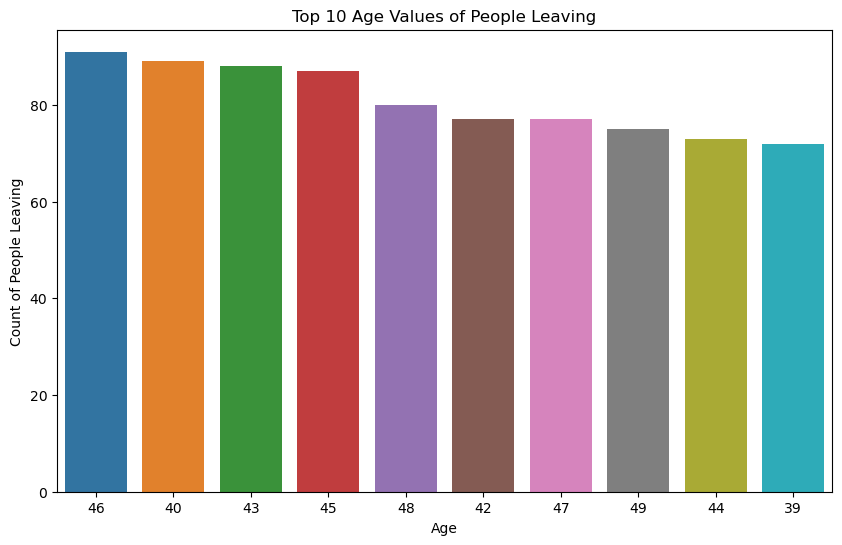

In [43]:
# Visulazation I Example: Histogram of 'Age' of  people who have 'Exited' (left)
exited_data = data[data['Exited'] == 1]

# Get the top 10 most frequent age values in descending order
top_10_age_values = exited_data['Age'].value_counts().sort_values(ascending=False).head(10)

# Create a countplot to show the top 10 age values
plt.figure(figsize=(10, 6))
sns.countplot(data=exited_data[exited_data['Age'].isin(top_10_age_values.index)], x='Age', order=top_10_age_values.index)
plt.xlabel('Age')
plt.ylabel('Count of People Leaving')
plt.title('Top 10 Age Values of People Leaving')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


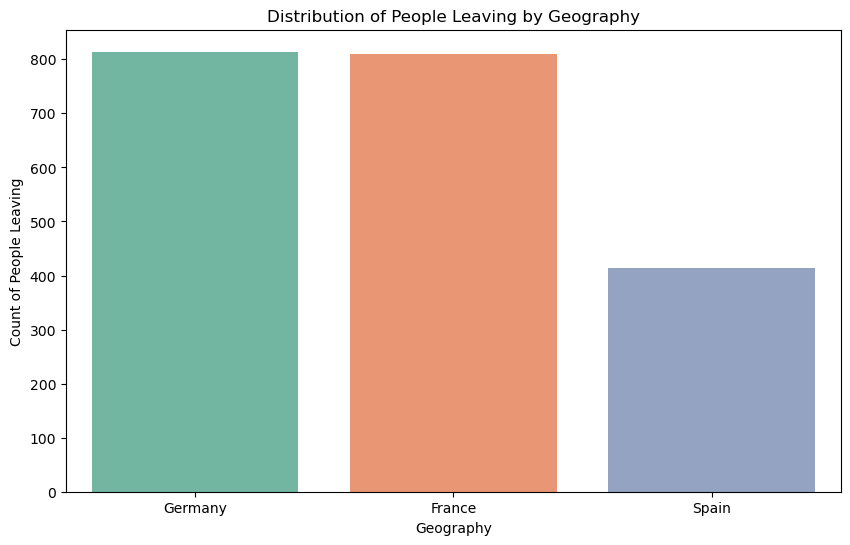

In [45]:
 # Visulazations II -  Plot bar charts for selected categorical features  for people who have 'Exited' (left)

exited_data = data[data['Exited'] == 1]

# Create a countplot to show the distribution of exited people by geography
plt.figure(figsize=(10, 6))
sns.countplot(data=exited_data, x='Geography', palette='Set2', order=exited_data['Geography'].value_counts().index)
plt.xlabel('Geography')
plt.ylabel('Count of People Leaving')
plt.title('Distribution of People Leaving by Geography')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


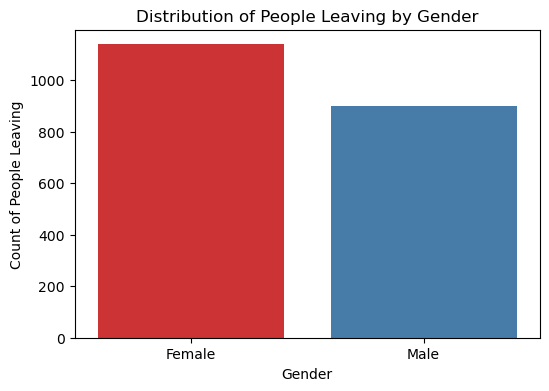

In [46]:
# Visulazations III -  Plot bar charts for selected categorical features  for people who have 'Exited' (left)


# Filter the data for people who have 'Exited' (left)
exited_data = data[data['Exited'] == 1]

# Create a countplot to show the distribution of exited people by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=exited_data, x='Gender', palette='Set1', order=exited_data['Gender'].value_counts().index)
plt.xlabel('Gender')
plt.ylabel('Count of People Leaving')
plt.title('Distribution of People Leaving by Gender')
plt.show()


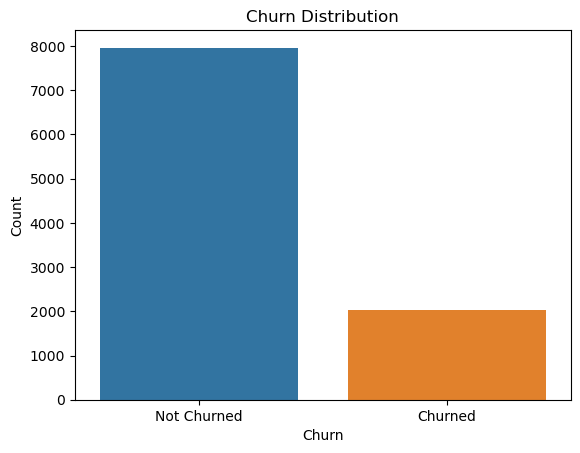

In [12]:
# Step IV : Target Variable Distribution
# Visualize the distribution of churned vs. non-churned customers
sns.countplot(x='Exited', data=data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Churn Distribution')
plt.show()


C:\Users\91630\AppData\Local\Temp\ipykernel_26956\1520533094.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


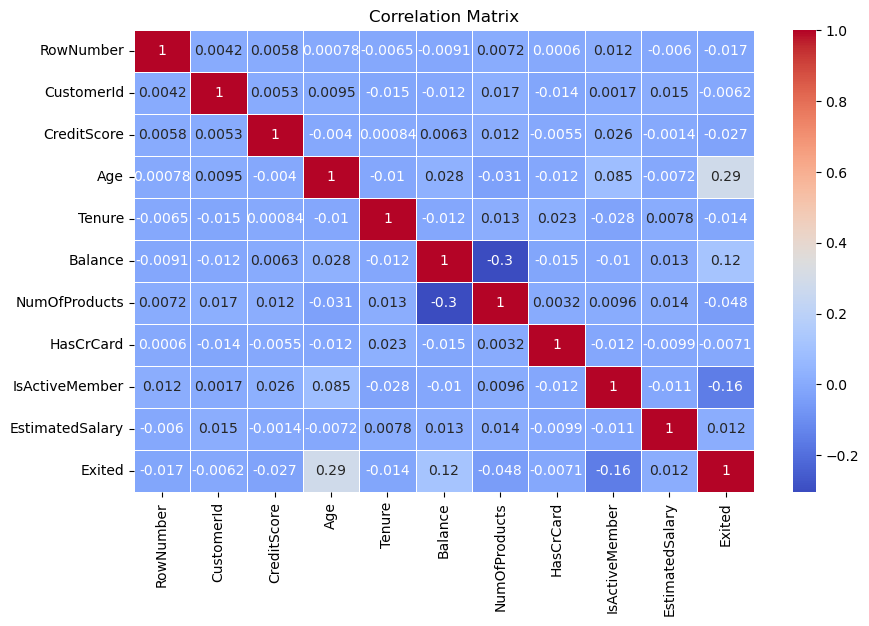

In [10]:
 # Visulazations V - Correlation matrix
corr_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [16]:
# Define your features (X) and the target label (y)
X = data.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = data["Exited"]

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Define a list of categorical columns to encode
categorical_columns = ["Geography", "Gender"]

In [19]:
# Create a ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'  # Keep non-categorical columns as they are
)


In [20]:
# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_encoded = preprocessor.transform(X_test)


In [21]:
# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters as needed
model.fit(X_train_encoded, y_train)

# Make predictions using the trained model
y_pred = model.predict(X_test_encoded)

In [22]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.866
Confusion Matrix:
 [[1544   63]
 [ 205  188]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



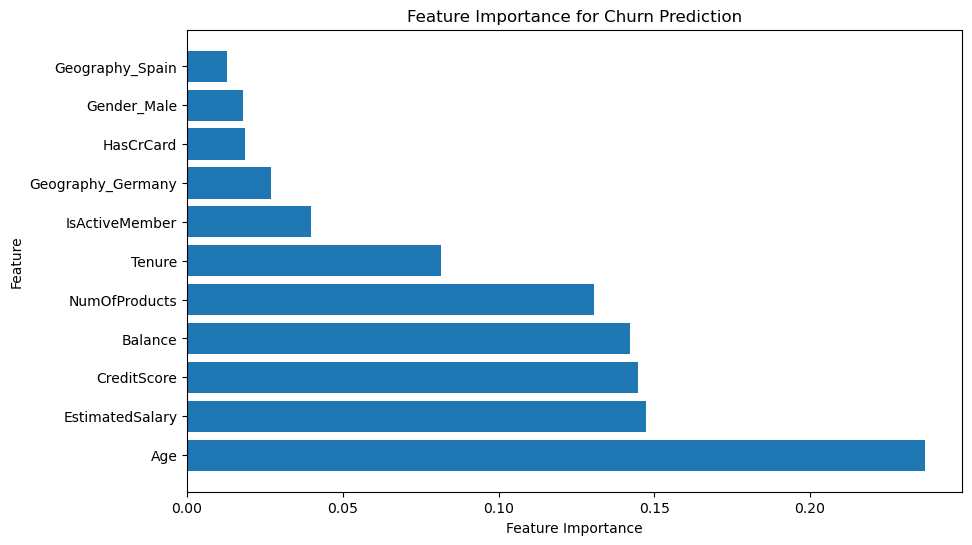

Top 5 Most Important Features:
           Feature  Importance
1              Age    0.236949
7  EstimatedSalary    0.147477
0      CreditScore    0.144924
3          Balance    0.142106
4    NumOfProducts    0.130680


In [25]:
# Create a new DataFrame with one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters as needed
model.fit(X_encoded, y)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Churn Prediction')
plt.show()

# Display the top N most important features
N = 5  # You can adjust N based on your preference
top_features = feature_importance_df.head(N)
print("Top", N, "Most Important Features:")
print(top_features)